In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r'~/Downloads/Iowa_Liquor_Sales.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
##Dataset familiarization

In [4]:
train.shape, train.columns

((19666763, 24),
 Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
        'City', 'Zip Code', 'Store Location', 'County Number', 'County',
        'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
        'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
        'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
        'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
       dtype='object'))

In [84]:
train.head(10)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S20368200013,07/29/2014,4205,Fareway Stores #467 / Marshalltown,102 WEST ANSON ST,MARSHALLTOWN,50158,POINT (-92.914409 42.038157000000005),64.0,Marshall,...,31475,New Amsterdam Gin,12,750,6.90,10.35,3,31.05,2.25,0.59
1,S21259600033,09/16/2014,4805,Liquor Tobacco & Grocery / Fort Dodg,902 1ST AVE N,FORT DODGE,50501,POINT (-94.186138 42.506332),94.0,Webster,...,40359,Burnett's Strawberry Banana,12,750,4.84,7.26,2,14.52,1.50,0.40
2,S24224800069,02/25/2015,3820,"Charlie's Wine and Spirits,",507 W 19th St,SIOUX CITY,51103,POINT (-96.420193 42.510535),97.0,Woodbury,...,56196,Paul Masson Peach Grande Amber Brandy,12,750,6.30,9.45,12,113.40,9.00,2.38
3,S19640700014,06/19/2014,4595,Quik Trip #559 / Fleur Dr DM,4024 FLEUR DR,DES MOINES,50321,POINT (-93.645068 41.547105),77.0,Polk,...,26823,Jack Daniels Old #7 Black Lbl,48,200,4.08,6.12,6,36.72,1.20,0.32
4,S21652000011,10/08/2014,2621,Hy-Vee Food Store #3 / Sioux City,3301 GORDON DR,SIOUX CITY,51105,POINT (-96.364108 42.487752),97.0,Woodbury,...,32237,Seagrams Extra Dry Gin,12,1000,7.49,11.24,12,134.88,12.00,3.17
5,S28464700035,10/14/2015,2585,Hy-Vee Wine and Spirits / Algona,1516 HIGHWAY 169 NORTH,ALGONA,50511,POINT (-94.236003 43.081288),55.0,Kossuth,...,31658,Paramount Gin,6,1750,7.11,10.67,6,64.02,10.50,2.77
6,S04521000078,03/13/2012,2506,Hy-Vee #1044 / Burlington,3140 AGENCY,BURLINGTON,52601,POINT (-91.136655 40.814666),29.0,Des Moines,...,20248,Old Crow,6,1750,8.92,13.38,6,80.28,10.50,2.77
7,S17972200015,03/19/2014,3820,"Charlie's Wine and Spirits,",507 W 19th St,SIOUX CITY,51103,POINT (-96.420193 42.510535),97.0,Woodbury,...,38177,Titos Handmade Vodka,12,1000,11.92,17.88,24,429.12,24.00,6.34
8,S13877100006,08/13/2013,2544,Hy-Vee Food Store / Marshalltown,802 SOUTH CENTER,MARSHALLTOWN,50158,POINT (-92.912817 42.039205),64.0,Marshall,...,35418,Burnett's Vodka 80 Prf,6,1750,8.78,13.68,6,82.08,10.50,2.77
9,S03561700097,01/12/2012,2561,Hy-Vee Food Store / Fleur / DSM,4605 FLEUR DRIVE,DES MOINES,50321,POINT (-93.64494300000001 41.542748),77.0,Polk,...,4356,Balvenie 12yr Doublewood Single Malt Scotch,12,750,30.41,45.62,1,45.62,0.75,0.20


In [85]:
missingRows = pd.isnull(train).sum(axis=1) > 0
missingCols = pd.isnull(train).sum(axis=0) > 0
print('The columns with missingness are %s' %(train.columns[missingCols]))

The columns with missingness are Index(['Address', 'City', 'Zip Code', 'Store Location', 'County Number',
       'County', 'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)'],
      dtype='object')


In [86]:
missing = ['Address', 'City', 'Zip Code', 'Store Location', 'County Number',
       'County', 'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)']

for feature in missing:
    print('{} is missing {} values'.format(feature, train[feature].isna().sum()))

Address is missing 79927 values
City is missing 79926 values
Zip Code is missing 79971 values
Store Location is missing 1886023 values
County Number is missing 156731 values
County is missing 156729 values
Category is missing 16974 values
Category Name is missing 25040 values
Vendor Number is missing 5 values
Vendor Name is missing 3 values
State Bottle Cost is missing 10 values
State Bottle Retail is missing 10 values
Sale (Dollars) is missing 10 values


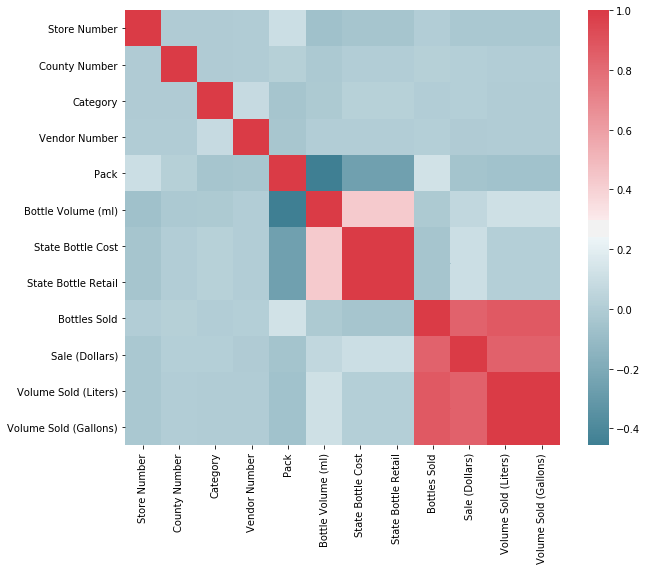

In [87]:
import seaborn as sns

f, ax = plt.subplots(figsize = (10,8))
corr = train.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220, 10, as_cmap = True),
           square = True, ax = ax)

In [88]:
##EDA

In [104]:
len(train['Item Number'].unique()), len(train['Item Description'].unique())

(11703, 8706)

In [ ]:
##Feature engineering a product profit proxy 

In [4]:
train['Profit'] = train['State Bottle Retail'] - train['State Bottle Cost']

In [32]:
train['Category Name'] = train['Category Name'].str.title()
train['Vendor Name'] = train['Vendor Name'].str.lower()

In [ ]:
##Finding most profitable product categories

In [91]:
train.groupby('Category Name')[['Profit']].agg(np.sum).sort_values(['Profit'], ascending = False).head(10)

,Profit
Category Name,
Canadian Whiskies,9.224773e+06
Straight Bourbon Whiskies,7.012432e+06
American Vodkas,4.873936e+06
Spiced Rum,4.812447e+06
Whiskey Liqueur,4.765944e+06
Vodka 80 Proof,3.915387e+06
Tennessee Whiskies,3.573963e+06
Blended Whiskies,3.105808e+06
Scotch Whiskies,3.069925e+06


In [ ]:
##Exploring top products and the top vendors within those top product categories

In [98]:
train.groupby(['Category Name', 'Item Description'])[['Profit']].agg(np.sum).loc[['Canadian Whiskies']].sort_values(['Profit'], ascending = False).head(10)

Profit
Category Name     Item Description                          
Canadian Whiskies Black Velvet                  1.734945e+06
                  Crown Royal Canadian Whisky   1.128410e+06
                  Crown Royal                   9.999935e+05
                  Crown Royal Regal Apple       8.711860e+05
                  Canadian Club Whisky          4.632062e+05
                  Canadian Ltd Whisky           4.188735e+05
                  Black Velvet Toasted Caramel  3.484860e+05
                  Windsor Canadian Pet          2.057505e+05
                  Crown Royal Black             1.998549e+05
                  Black Velvet Reserve          1.778548e+05

In [99]:
train.groupby(['Category Name', 'Vendor Name'])[['Profit']].agg(np.sum).loc[['Canadian Whiskies']].sort_values(['Profit'], ascending = False).head(10)

Profit
Category Name     Vendor Name                                   
Canadian Whiskies Diageo Americas                   4.344646e+06
                  Constellation Wine Company, Inc.  1.333310e+06
                  Constellation Brands Inc          1.012404e+06
                  Jim Beam Brands                   8.993296e+05
                  Sazerac North America             4.674429e+05
                  Heaven Hill Brands                3.088149e+05
                  Proximo                           1.245395e+05
                  Brown-Forman Corporation          1.232710e+05
                  Luxco-St Louis                    1.035978e+05
                  Hood River Distillers, Inc.       9.703781e+04

In [100]:
train.groupby(['Category Name', 'Item Description'])[['Profit']].agg(np.sum).loc[['American Vodkas']].sort_values(['Profit'], ascending = False).head(10)

Profit
Category Name   Item Description                   
American Vodkas Titos Handmade Vodka  981602.689998
                Hawkeye Vodka         504642.870001
                Smirnoff 80prf        433193.560000
                Five O'clock Vodka    196178.780000
                Phillips Vodka        162550.670000
                Barton Vodka          153644.290000
                Mccormick Vodka Pet   144583.580000
                Five O'Clock Vodka    142714.210000
                New Amsterdam Vodka   140532.700000
                Smirnoff PET 80prf    116978.290000

In [101]:
train.groupby(['Category Name', 'Vendor Name'])[['Profit']].agg(np.sum).loc[['American Vodkas']].sort_values(['Profit'], ascending = False).head(10)

Profit
Category Name   Vendor Name                           
American Vodkas Fifth Generation Inc      1.069154e+06
                Diageo Americas           9.228477e+05
                Luxco Inc                 5.837648e+05
                Laird & Company           3.823682e+05
                Sazerac North America     3.406004e+05
                Phillips Beverage         3.275045e+05
                Mccormick Distilling Co.  3.183519e+05
                E & J Gallo Winery        2.937961e+05
                Sazerac Company  Inc      1.650271e+05
                Heaven Hill Brands        1.012882e+05

In [102]:
train.groupby(['Category Name', 'Item Description'])[['Profit']].agg(np.sum).loc[['Straight Bourbon Whiskies']].sort_values(['Profit'], ascending = False).head(10)

Profit
Category Name             Item Description                        
Straight Bourbon Whiskies Jim Beam                      1139201.24
                          Maker's Mark                   547992.92
                          Ten High                       319646.43
                          Wild Turkey 101                304661.77
                          Cedar Ridge Bourbon            243285.05
                          Old Crow                       235419.76
                          Bulleit Bourbon                184465.43
                          Knob Creek                     183197.76
                          Evan Williams Yr Str Bourbon   180570.19
                          Ancient Age Bourbon            164516.75

In [103]:
train.groupby(['Category Name', 'Vendor Name'])[['Profit']].agg(np.sum).loc[['Straight Bourbon Whiskies']].sort_values(['Profit'], ascending = False).head(10)

Profit
Category Name             Vendor Name                           
Straight Bourbon Whiskies Jim Beam Brands           3.470371e+06
                          Heaven Hill Brands        5.498628e+05
                          Sazerac North America     3.891640e+05
                          Campari(Skyy)             3.204017e+05
                          Diageo Americas           2.701718e+05
                          Sazerac Company  Inc      2.522293e+05
                          Brown Forman Corp.        2.373287e+05
                          Skyy Spirits Inc          2.172414e+05
                          Sazerac Co., Inc.         1.915051e+05
                          Cedar Ridge Vineyards Ll  1.451949e+05

In [ ]:
#Grouping top vendors by profit

In [18]:
train.groupby('Vendor Name')[['Profit']].agg(np.sum).sort_values(['Profit'], ascending = False).head(10)



,Profit
Vendor Name,
diageo americas,2.016477e+07
jim beam brands,8.892005e+06
sazerac company inc,4.223846e+06
proximo,3.844647e+06
pernod ricard usa/austin nichols,3.727960e+06
pernod ricard usa,3.538030e+06
heaven hill brands,3.365814e+06
sazerac north america,2.919854e+06
luxco-st louis,2.900950e+06


In [ ]:
##Grouping top sale locations by profit

In [20]:
train.groupby('Store Name')[['Profit']].agg(np.sum).sort_values(['Profit'], ascending = False).head(10)



,Profit
Store Name,
Hy-Vee #3 / BDI / Des Moines,1053566.02
Central City 2,894017.93
"Central City Liquor, Inc.",865501.26
Hy-Vee Wine and Spirits / Iowa City,671912.32
Hy-Vee Wine and Spirits / Bettendorf,592715.41
Benz Distributing,574017.61
Cyclone Liquors,557151.01
Hy-Vee Food Store #1 / Mason City,549242.39
Hy-Vee Food Store / Cedar Falls,531059.42


In [81]:
train.groupby(['Store Name', 'Item Description'])[['Profit']].agg(np.sum).loc[['Hy-Vee #3 / BDI / Des Moines']].sort_values(['Profit'], ascending = False).head(10)



Profit
Store Name                   Item Description                               
Hy-Vee #3 / BDI / Des Moines Grand Marnier Cordon Rouge             11279.05
                             Patron Tequila Silver                  10514.80
                             Maker's Mark                            9790.41
                             Don Julio Reposado                      8338.76
                             Ciroc Peach                             7643.22
                             Jagermeister Liqueur                    7586.92
                             Jose Cuervo Especial Reposado Tequila   7427.30
                             Cointreau Liqueur                       7227.90
                             Crown Royal Canadian Whisky             7151.45
                             Tanqueray Gin                           7149.97

In [24]:
train['City'] = train['City'].str.title()
train.groupby('City')[['Profit']].agg(np.sum).sort_values(['Profit'], ascending = False).head(15)


,Profit
City,
Des Moines,8.668019e+06
Cedar Rapids,6.190702e+06
Davenport,4.009393e+06
Iowa City,2.951878e+06
West Des Moines,2.920907e+06
Waterloo,2.884458e+06
Ames,2.870596e+06
Sioux City,2.841747e+06
Council Bluffs,2.788847e+06


In [79]:
train.groupby(['City', 'Item Description'])[['Profit']].agg(np.sum).loc[['Des Moines']].sort_values(['Profit'], ascending = False).head(10)



Profit
City       Item Description                                   
Des Moines Fireball Cinnamon Whiskey Mini Dispenser  199480.30
           Hennessy VS                               124691.16
           Black Velvet                              108087.76
           Fireball Cinnamon Whiskey                 101304.58
           Jack Daniels Old #7 Black Lbl              87605.52
           Hennessy Vs Cognac                         85736.20
           Hawkeye Vodka                              81641.62
           Jagermeister Liqueur                       80448.51
           Grey Goose Vodka                           79981.47
           Patron Tequila Silver                      78899.45

In [ ]:
##Performing analysis to see unique products sold every year 

In [5]:
train1 = train.copy()
train1['Date'].dtype

dtype('O')

In [6]:
train1['Date'] = pd.to_datetime(train1['Date'])

In [7]:
train1['Order.Year'] = train1['Date'].dt.year
train1['Order.Month'] = train1['Date'].dt.month
train1['Order.Day'] = train1['Date'].dt.dayofyear

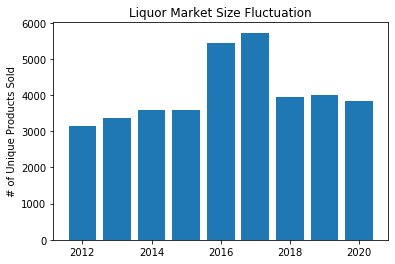

In [32]:
grouped = train1.groupby(by = 'Order.Year')
allproducts = []

for year in range(2012, 2021):
    y = grouped.get_group(year).drop_duplicates(subset=['Item Number'])
    allproducts.append(len(y.index))

years = range(2012, 2021)
    
plt.bar(years, allproducts)
plt.ylabel('# of Unique Products Sold')
plt.title('Liquor Market Size Fluctuation')
plt.show()



In [ ]:
##Performing analysis to see which products sold in 2012 are still selling in 2020

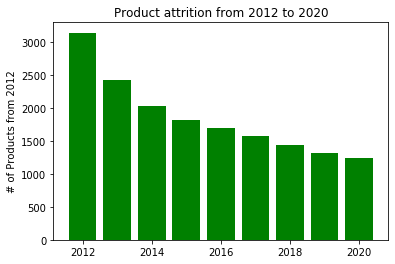

In [31]:
grouped = train1.groupby(by = 'Order.Year')
productsurvival2012 = [len(prod2012.index)]
prod2012 = grouped.get_group(2012).drop_duplicates(subset=['Item Number'])

for year in range(2013, 2021):
    y = grouped.get_group(year).drop_duplicates(subset=['Item Number'])
    mergedprod = pd.merge(prod2012, y, on = 'Item Number', how = 'inner')
    productsurvival2012.append(len(mergedprod.index))

years = range(2012, 2021)
    
plt.bar(years, productsurvival2012, color = 'green')
plt.ylabel('# of Products from 2012')
plt.title('Product attrition from 2012 to 2020')
plt.show()



In [33]:
productsurvival2012

[3146, 2426, 2034, 1813, 1698, 1575, 1433, 1318, 1248]

In [ ]:
##Order frequency

Text(0, 0.5, 'Frequency')

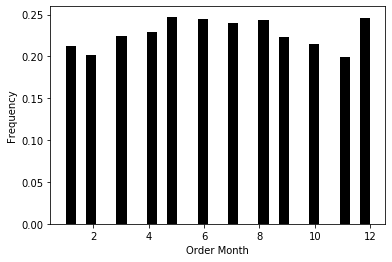

In [36]:
x = train1['Order.Month']
plt.hist(x, color = 'black', bins = 30, density = True)
plt.xlabel('Order Month')
plt.ylabel('Frequency')

In [ ]:
##Seasonal demand analysis for top 3 product categories

In [14]:
cw = train1.groupby(['Category Name', 'Order.Month'])[['Profit']].agg(np.sum).loc[['Canadian Whiskies']].reset_index()
av = train1.groupby(['Category Name', 'Order.Month'])[['Profit']].agg(np.sum).loc[['American Vodkas']].reset_index()
sbw = train1.groupby(['Category Name', 'Order.Month'])[['Profit']].agg(np.sum).loc[['Straight Bourbon Whiskies']].reset_index()


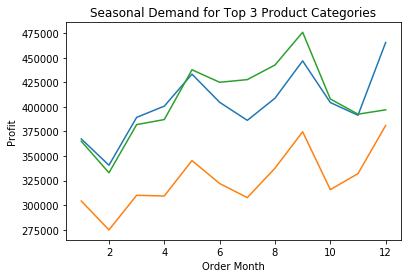

In [46]:
fig = plt.figure()
for frame in [cw, sbw, av]:
    plt.plot(frame['Order.Month'], frame['Profit'])

plt.xlabel('Order Month')
plt.ylabel('Profit')
plt.title('Seasonal Demand')
plt.show()